# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../data/employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.groupby('Department')[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
employees.pivot_table('Salary', 'Department', aggfunc = 'mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.pivot_table(employees,index=['Department'],columns=['Title'],values='Salary',aggfunc='mean')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
pd.pivot_table(employees,index=['Years'],columns=['Title'],values=['Salary'])

Salary                  
Title     VP analyst associate
Years                         
1        NaN    35.0       NaN
2        NaN    30.0      55.0
3        NaN     NaN      55.0
4        NaN    35.0       NaN
7        NaN     NaN      60.0
8       70.0     NaN       NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
df_pivot=pd.pivot_table(employees,values=["Salary","Name"],index=["Department"],columns=["Title"],
               aggfunc={"Salary":"mean","Name":"count"})
df_pivot.columns
df_pivot.rename(columns={"Name":"Number of Employees"})

Number of Employees                   Salary                  
Title                       VP analyst associate     VP analyst associate
Department                                                               
HR                         1.0     2.0       NaN   70.0    32.5       NaN
IT                         1.0     2.0       1.0   70.0    32.5      60.0
Sales                      NaN     NaN       2.0    NaN     NaN      55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
table=pd.pivot_table(employees,index=['Department'],columns=['Title'],values='Salary',aggfunc=["median","min","max","std"])
table

median                     min                     max          \
Title          VP analyst associate    VP analyst associate    VP analyst   
Department                                                                  
HR           70.0    32.5       NaN  70.0    30.0       NaN  70.0    35.0   
IT           70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales         NaN     NaN      55.0   NaN     NaN      55.0   NaN     NaN   

                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

In [9]:
"""
your commments here

 i see lot of missing values especially in case of associates
"""

'\nyour commments here\n\n i see lot of missing values especially in case of associates\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
table.fillna(0)

median                     min                     max          \
Title          VP analyst associate    VP analyst associate    VP analyst   
Department                                                                  
HR           70.0    32.5       0.0  70.0    30.0       0.0  70.0    35.0   
IT           70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales         0.0     0.0      55.0   0.0     0.0      55.0   0.0     0.0   

                           std            
Title      associate   analyst associate  
Department                                
HR               0.0  3.535534       0.0  
IT              60.0  3.535534       0.0  
Sales           55.0  0.000000       0.0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
pd.pivot_table(employees,values = 'Salary', index ='Department', aggfunc=['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
# your code here
pd.pivot_table(employees, columns=['Title'],values = ['Salary', 'Years'], index =['Department'], 
                            aggfunc = {'Salary' : 'mean' , 'Years' : 'sum'})

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [14]:
# your code here
fitbit = pd.read_csv('../data/fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
# your code here
fitbit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000000,2974.000000,3233.000000,4351.000000
Steps,367.0,10121.588556,5594.836225,0.000,6730.500000,10413.000000,13916.500000,26444.000000
Distance,367.0,8.549128,3.409881,0.000,6.155000,8.290000,10.560000,20.450000
Floors,367.0,11.724796,10.337370,0.000,5.000000,11.000000,16.000000,101.000000
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000000,663.000000,756.500000,998.000000
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000000,226.000000,290.000000,472.000000
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000000,24.000000,41.500000,101.000000
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500000,29.000000,54.000000,153.000000
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500000,1553.000000,1927.500000,9830.000000
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000000,337.000000,400.500000,553.000000


In [16]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [17]:
# your code here
fitbit[['Minutes Very Active', 'Steps']].corr()
#or
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [18]:
import matplotlib.pyplot as plt;

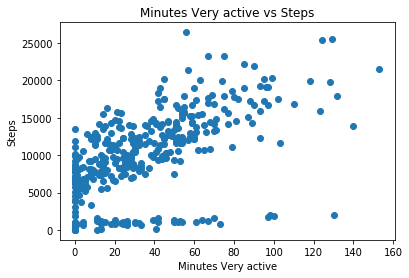

In [19]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""
plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title('Minutes Very active vs Steps')
plt.xlabel('Minutes Very active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [20]:
"""
your commments here
There seems to be a positive relation between Minutes very active and the Number of Steps 
"""

'\nyour commments here\nThere seems to be a positive relation between Minutes very active and the Number of Steps \n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [21]:
# your code here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

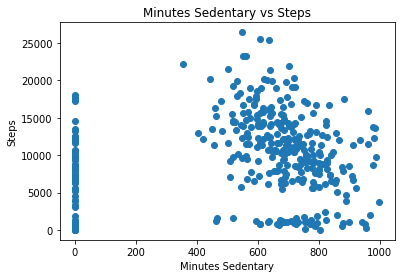

In [22]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [23]:
"""
your commments here
I am  unable to see a correlation between Minutes Sedentary and  number of steps
"""

'\nyour commments here\nI am  unable to see a correlation between Minutes Sedentary and  number of steps\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [24]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

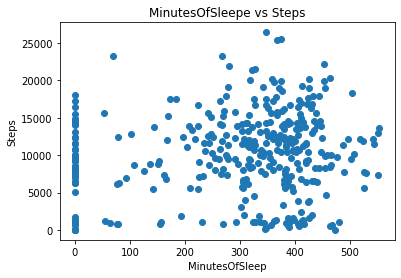

In [25]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'],fitbit['Steps'])
plt.title('MinutesOfSleepe vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [26]:
"""
your commments here
 There is no correlation between minutes of sleep and the number of steps 
"""

'\nyour commments here\n There is no correlation between minutes of sleep and the number of steps \n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [27]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [28]:
# your code here
fitbit_subset = fitbit[columns]
cor_fit = fitbit_subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [29]:
# your code here
fitbit_subset.corr()["Steps"].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

In [30]:
'''
Based on results above, Minutes Very Active column has the highest correlation with Steps.
'''

'\nBased on results above, Minutes Very Active column has the highest correlation with Steps.\n'

# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [31]:
# your code here
time_grades=pd.read_csv("../data/Time_Grades.csv",sep=",")
time_grades.head()


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

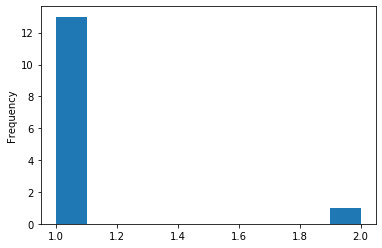

In [32]:
# your code here
time_grades['Study time'].value_counts().plot(kind='hist')

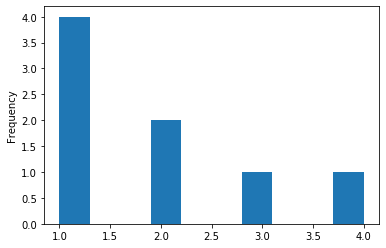

In [33]:
time_grades['Grade'].value_counts().plot(kind='hist')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [34]:
# your code here
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [35]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [36]:
"""
your commments here
pearson test outcome is lower than spearman
"""

'\nyour commments here\npearson test outcome is lower than spearman\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

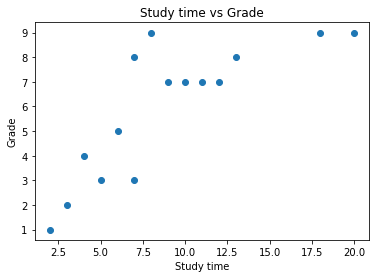

In [37]:
# your code here
plt.scatter(time_grades['Study time'],time_grades['Grade'])
plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()


In [38]:
"""
your commments here
 Study time is positively correlated with Grades
"""

'\nyour commments here\n Study time is positively correlated with Grades\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [39]:
"""
your commments here
The Pearson correlation evaluates the linear relationship between two continuous variables.
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. 
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data
"""

'\nyour commments here\nThe Pearson correlation evaluates the linear relationship between two continuous variables.\nThe Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. \nThe Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data\n'